In [57]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
df = pd.read_csv("../modelling_joseph/final.csv")
df = df.drop('Unnamed: 0' , axis = 1)

In [ ]:
total_copy_item_1 = total_copy[total["item_nbr"] == 1]
plt.figure(figsize=(30,9))
sns.boxplot(x="yearmonth", y="units", data=total_copy_item_1[["yearmonth", "units"]])

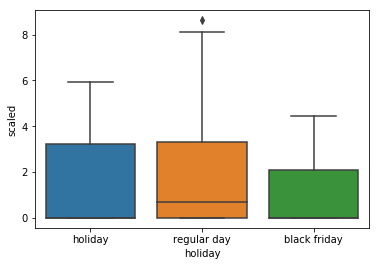

In [80]:
sns.boxplot(x="holiday" , y="scaled" , data =df[['holiday', 'scaled']])

<Figure size 1440x720 with 0 Axes>

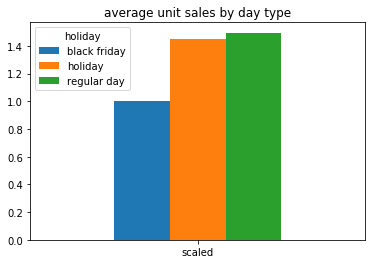

In [78]:
plt.figure(figsize = (20,10))
x = pd.DataFrame(df.groupby(['holiday'])['scaled'].mean()).transpose()
x.plot(kind='bar', title = 'average unit sales by day type')
plt.xticks(rotation = 360)
plt.show()

In [59]:
# holiday 추가해주기 
import re 
with open('/Users/taeahn/Desktop/Team Project/Data/base_dataset/holiday_names.txt') as file:  
    data = file.readlines()
    holidays = []
    months = ["", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    for holiday in data : 
        holidays.append(holiday.split(" ")[:3])
    for i in range(len(holidays)): 
        month_idx = months.index(holidays[i][1])
        if month_idx < 10:
            holidays[i][1] = "0" + str(month_idx)
        else:
            holidays[i][1] = str(month_idx)
    for z in range(len(holidays)) : 
        if len(holidays[z][2]) == 1 : 
            holidays[z][2] = '0' + holidays[z][2]

# holiday 구분하기 
def isholiday(dt): 
    temp = str(dt)
    if temp.split("-") in holidays :
        return "holiday"
    else :
        return "regular day"

df['holiday2'] = df['date'].apply(isholiday)

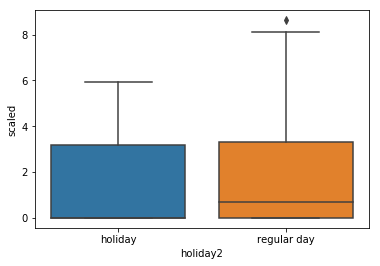

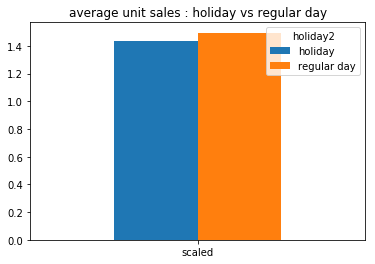

In [82]:
sns.boxplot(x="holiday2" , y="scaled" , data =df[['holiday2', 'scaled']])
x = pd.DataFrame(df.groupby(['holiday2'])['scaled'].mean()).transpose()
x.plot(kind='bar', title = 'average unit sales : holiday vs regular day')
plt.xticks(rotation = 360)
plt.show()

In [85]:
# independent two sample test
# holiday 와 regular_day 의 sales 의 분포가 다르기 때문에 넣어야 한다 
from scipy import stats
holiday = np.array(df[df['holiday2'] == 'holiday']['scaled'])
regular_day = np.array(df[df['holiday2'] == 'regular day']['scaled'])
statistic , p_value = stats.ttest_ind(holiday,regular_day, equal_var = False)
p_value

0.00016014652195563267

In [86]:
import datetime
def isweekend(dt) : 
    day, month, year = (int(x) for x in dt.split('-'))  
    ans = datetime.date(day, month, year)
    p = datetime.date.weekday(ans)
    if p <= 5 : 
        return 'weekday'
    else : 
        return 'weekend'
df['isweekend'] = df['date'].apply(isweekend)

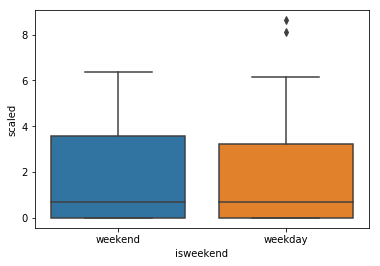

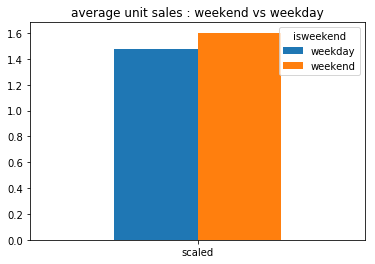

In [88]:
# weekend 가 훨씬 더 많이 팔리는 것을 알 수 있음
sns.boxplot(x="isweekend" , y="scaled" , data =df[['isweekend', 'scaled']])

x = pd.DataFrame(df.groupby(['isweekend'])['scaled'].mean()).transpose()
x.plot(kind='bar', title = 'average unit sales : weekend vs weekday')
plt.xticks(rotation = 360)
plt.show()

In [89]:
# independent two sample t-test
# 검정 결과에서 볼 수 있듯이 weekday 와 weekend 의 sales 는 다르다는 것을 알 수 있다
from scipy import stats
weekend = np.array(df[df['isweekend'] == 'weekend']['scaled'])
weekday = np.array(df[df['isweekend'] == 'weekday']['scaled'])
statistic , p_value = stats.ttest_ind(weekend ,weekday, equal_var = False)
p_value

5.239863992367436e-31